In [1]:
#Import Primary Modules
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

#Read the csv file
df=pd.read_csv('/Users/Rohini/Downloads/Electric_Vehicle_Population_Data (1).csv')

#show the first 5 rows 
df.head()
       
    

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
#Check the datatype of dataframe
print(df.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [5]:
#check the summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194232 entries, 0 to 194231
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         194232 non-null  object 
 1   County                                             194223 non-null  object 
 2   City                                               194223 non-null  object 
 3   State                                              194232 non-null  object 
 4   Postal Code                                        194223 non-null  float64
 5   Model Year                                         194232 non-null  int64  
 6   Make                                               194232 non-null  object 
 7   Model                                              194232 non-null  object 
 8   Electric Vehicle Type                              194232 non-null  object

In [6]:
#check the null values
missing_data=df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print(" ")

VIN (1-10)
False    194232
Name: VIN (1-10), dtype: int64
 
County
False    194223
True          9
Name: County, dtype: int64
 
City
False    194223
True          9
Name: City, dtype: int64
 
State
False    194232
Name: State, dtype: int64
 
Postal Code
False    194223
True          9
Name: Postal Code, dtype: int64
 
Model Year
False    194232
Name: Model Year, dtype: int64
 
Make
False    194232
Name: Make, dtype: int64
 
Model
False    194232
Name: Model, dtype: int64
 
Electric Vehicle Type
False    194232
Name: Electric Vehicle Type, dtype: int64
 
Clean Alternative Fuel Vehicle (CAFV) Eligibility
False    194232
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64
 
Electric Range
False    194230
True          2
Name: Electric Range, dtype: int64
 
Base MSRP
False    194230
True          2
Name: Base MSRP, dtype: int64
 
Legislative District
False    193800
True        432
Name: Legislative District, dtype: int64
 
DOL Vehicle ID
False    194232
Name: DOL Vehicle

In [7]:
#Fill the missing values
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].mean(), inplace=True)


In [8]:
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)
df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0], inplace=True)


In [9]:
df['Legislative District'].fillna(df['Legislative District'].mode()[0], inplace=True)


In [10]:
#Drop Rows with Missing Locations
df.dropna(subset=["Vehicle Location"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)


In [11]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [12]:
#change the data type
df=df.astype({'Postal Code':int,'Electric Range':int,'Base MSRP':int,'Legislative District':int,'2020 Census Tract':int})

In [13]:
print(df.dtypes)

VIN (1-10)                                           object
County                                               object
City                                                 object
State                                                object
Postal Code                                           int64
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
Base MSRP                                             int64
Legislative District                                  int64
DOL Vehicle ID                                        int64
Vehicle Location                                     object
Electric Utility                                     object
2020 Census Tract                       

In [14]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,21,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,53061041809
1,KNDJX3AEXG,King,Renton,WA,98058,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,11,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025804
2,5YJ3E1EA3L,King,Seattle,WA,98125,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000102
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,26,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,53035092902
4,5UXTA6C09P,Snohomish,Monroe,WA,98272,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,39,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,53061052203


In [15]:
df.rename(columns={'County':'Country'}, inplace = True)

In [16]:
import re

#Define a function to convert POINT format to (longitude, latitude) tuple
def extract_coordinates(point_str):
    
    if isinstance(point_str, str):
        match = re.match(r"POINT\s*\(\s*([-\d.]+)\s+([-\d.]+)\s*\)", point_str)
        if match: 
            longitude = float(match.group(1))
            latitude = float(match.group(2))
            return latitude, longitude  
    return None  

#Apply the function to the 'Vehicle Location' column
df['Vehicle Location'] = df['Vehicle Location'].apply(extract_coordinates)

#Separate columns for latitude and longitude
df['Latitude'] = df['Vehicle Location'].apply(lambda x: x[0] if x else None)
df['Longitude'] = df['Vehicle Location'].apply(lambda x: x[1] if x else None)

#Display the updated dataframe
df[['Vehicle Location', 'Latitude', 'Longitude']].head()


,Vehicle Location,Latitude,Longitude
0,"(47.8976713, -122.2507211)",47.897671,-122.250721
1,"(47.4438471, -122.1476337)",47.443847,-122.147634
2,"(47.715668, -122.304356)",47.715668,-122.304356
3,"(47.4739066, -122.6530052)",47.473907,-122.653005
4,"(47.854897, -121.968385)",47.854897,-121.968385


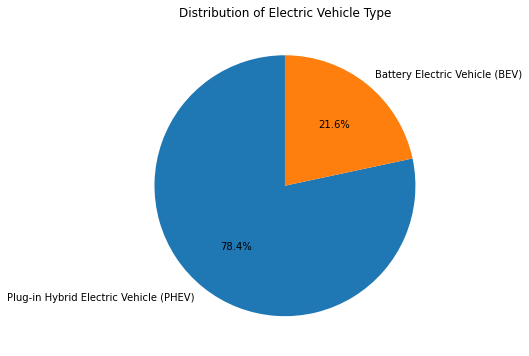

In [17]:
#Distribution of electric vehicle type using pie chart

Electric_Vehicle_Type_count=df['Electric Vehicle Type'].value_counts()
mylabels=["Plug-in Hybrid Electric Vehicle (PHEV)","Battery Electric Vehicle (BEV)"]
plt.figure(figsize=(8, 6))
# autopct create %, start angle represent starting point
plt.pie(Electric_Vehicle_Type_count,labels = mylabels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Type')
plt.show()

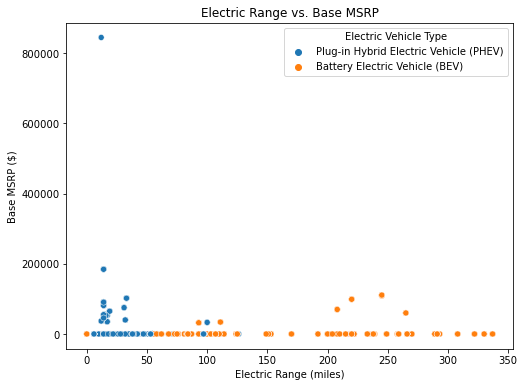

In [18]:
#Electric Range vs. Base MSRP using scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type',data=df)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Electric Vehicle Type')
plt.show()

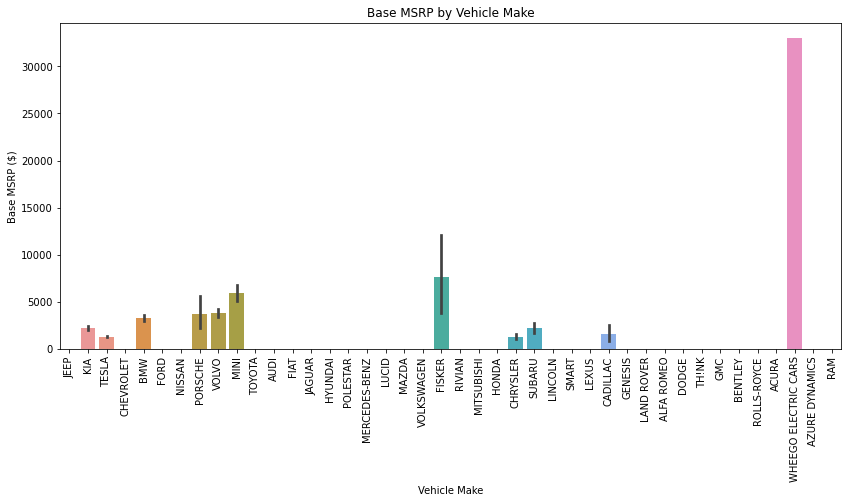

In [19]:
#Base MSRP by Vehicle Make using barplot
plt.figure(figsize=(14,6))
sns.barplot(x='Make',y='Base MSRP',data=df)
plt.xticks(rotation=90)
plt.title('Base MSRP by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Base MSRP ($)')
plt.show()



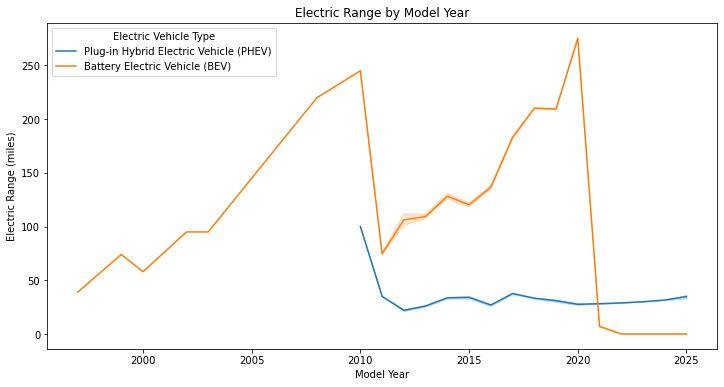

In [20]:
#Electric Range by Model Year using lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',hue='Electric Vehicle Type',data=df)
plt.title('Electric Range by Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()


In [21]:
import folium

In [27]:
#Create a base map centered around Washington State
Washing_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)


In [ ]:
# loop through the Make and add each to the map
for lat, lng, label in zip(df.Latitude, df.Longitude, df.Make):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Washing_map)

# show map
Washing_map